<a href="https://colab.research.google.com/github/venkateshblks/project/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_excel('Maintenance.xlsx')
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df = df.drop(["UDI",'Product ID'],axis=1)

In [ ]:
df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

<Axes: xlabel='Machine failure', ylabel='count'>

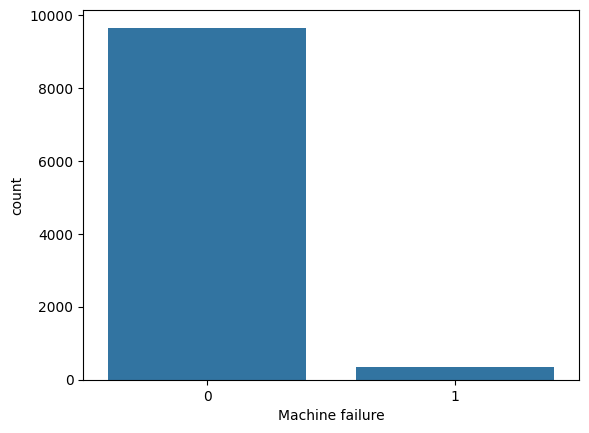

In [ ]:
sns.countplot(data=df,x='Machine failure')

<Axes: xlabel='Type', ylabel='count'>

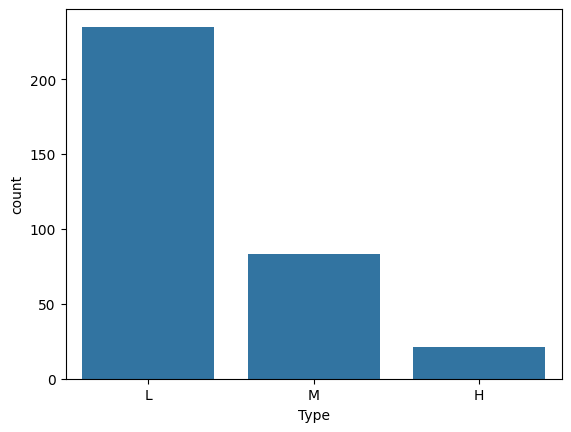

In [ ]:
sns.countplot(data=df[df['Machine failure']==1],x='Type')

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [40]:
df1=df.rename(columns={"Air temperature [K]": "air_Temp", "Process temperature [K]": "process_Temp",
                   'Rotational speed [rpm]':'R_speed_rpm','Torque [Nm]':'torque_nm','Tool wear [min]':'tool_wear'})
df1

Type  air_Temp  process_Temp  R_speed_rpm  torque_nm  tool_wear  \
0        1     298.1         308.6         1551       42.8          0   
1        0     298.2         308.7         1408       46.3          3   
2        0     298.1         308.5         1498       49.4          5   
3        0     298.2         308.6         1433       39.5          7   
4        0     298.2         308.7         1408       40.0          9   
...    ...       ...           ...          ...        ...        ...   
9995     1     298.8         308.4         1604       29.5         14   
9996     2     298.9         308.4         1632       31.8         17   
9997     1     299.0         308.6         1645       33.4         22   
9998     2     299.0         308.7         1408       48.5         25   
9999     1     299.0         308.7         1500       40.2         30   

      Machine failure  TWF  HDF  PWF  OSF  RNF  
0                   0    0    0    0    0    0  
1                   0    0    0    0    0    0  
2                   0    0    0    0    0    0  
3                   0    0    0    0    0    0  
4                   0    0    0    0    0    0  
...               ...  ...  ...  ...  ...  ...  
9995                0    0    0    0    0    0  
9996                0    0    0    0    0    0  
9997                0    0    0    0    0    0  
9998                0    0    0    0    0    0  
9999                0    0    0    0    0    0  

[10000 rows x 12 columns]

In [ ]:
import plotly.express as px
px.scatter_3d(df, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Machine failure')

In [41]:
df["Type"] = df["Type"].replace("L",0)
df["Type"] = df["Type"].replace("M",1)
df["Type"] = df["Type"].replace("H",2)
df

Type  Air temperature [K]  Process temperature [K]  \
0        1                298.1                    308.6   
1        0                298.2                    308.7   
2        0                298.1                    308.5   
3        0                298.2                    308.6   
4        0                298.2                    308.7   
...    ...                  ...                      ...   
9995     1                298.8                    308.4   
9996     2                298.9                    308.4   
9997     1                299.0                    308.6   
9998     2                299.0                    308.7   
9999     1                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

In [43]:
from sklearn.model_selection import train_test_split
X=df1.drop(['Machine failure'],axis=1)
y=df1['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train

Type  air_Temp  process_Temp  R_speed_rpm  torque_nm  tool_wear  TWF  \
9069     1     297.2         308.2         1678       28.1        133    0   
2603     1     299.3         309.2         1334       46.3         31    0   
7738     1     300.5         312.0         1263       60.8        146    0   
1579     0     298.3         308.3         1444       43.8        176    0   
5058     0     303.9         312.9         1526       42.5        194    0   
...    ...       ...           ...          ...        ...        ...  ...   
5734     0     302.3         311.8         1369       56.2        208    0   
5191     0     304.0         313.2         1416       46.0        128    0   
5390     2     302.8         312.3         1483       47.2        223    0   
860      2     296.1         306.9         1541       32.6         33    0   
7270     0     300.2         310.4         1808       25.8         35    0   

      HDF  PWF  OSF  RNF  
9069    0    0    0    0  
2603    0    0    0    0  
7738    0    0    0    0  
1579    0    0    0    0  
5058    0    0    0    0  
...   ...  ...  ...  ...  
5734    0    0    1    0  
5191    0    0    0    0  
5390    0    0    0    0  
860     0    0    0    0  
7270    0    0    0    0  

[7000 rows x 11 columns]

In [44]:
df1.isna().sum()

Type               0
air_Temp           0
process_Temp       0
R_speed_rpm        0
torque_nm          0
tool_wear          0
Machine failure    0
TWF                0
HDF                0
PWF                0
OSF                0
RNF                0
dtype: int64

In [45]:
#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
model=mlp.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2907
           1       1.00      0.00      0.00        93

    accuracy                           0.97      3000
   macro avg       0.98      0.50      0.49      3000
weighted avg       0.97      0.97      0.95      3000



In [48]:
#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
model1=xgb.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred1


array([0, 0, 0, ..., 0, 0, 0])

In [49]:
print(classification_report(y_test, y_pred1, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

